In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df= pd.read_csv('time_series_data.csv')

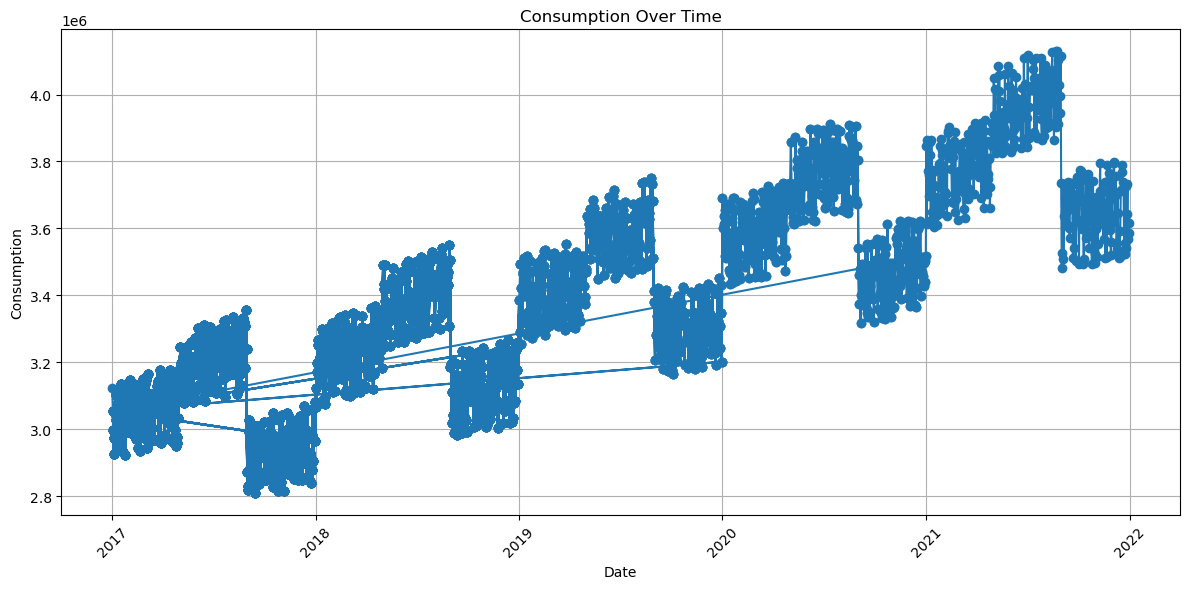

In [59]:

# Assuming you have loaded your DataFrame 'df' already

# Convert the 'Date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Create a line plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(df['date'], df['consumption'], marker='o', linestyle='-')
plt.title('Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.grid(True)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [60]:
df.head(5)

,date,connection,population,actual_limit,factor,consumption,Unnamed: 6
0,2017-01-01,4037,19373,2615355,1.193640,3.121792e+06,NaN
1,2017-01-02,4038,19378,2616030,1.167478,3.054157e+06,NaN
2,2017-01-03,4039,19383,2616705,1.145279,2.996857e+06,NaN
3,2017-01-04,4039,19383,2616705,1.118182,2.925952e+06,NaN
4,2017-01-05,4040,19387,2617245,1.136099,2.973448e+06,NaN


In [61]:
df = df.iloc[:,0:-1]
df.head(5)

,date,connection,population,actual_limit,factor,consumption
0,2017-01-01,4037,19373,2615355,1.193640,3.121792e+06
1,2017-01-02,4038,19378,2616030,1.167478,3.054157e+06
2,2017-01-03,4039,19383,2616705,1.145279,2.996857e+06
3,2017-01-04,4039,19383,2616705,1.118182,2.925952e+06
4,2017-01-05,4040,19387,2617245,1.136099,2.973448e+06


In [62]:
df['consumption'] = df['consumption'].astype(int)
df.head(5)

,date,connection,population,actual_limit,factor,consumption
0,2017-01-01,4037,19373,2615355,1.193640,3121791
1,2017-01-02,4038,19378,2616030,1.167478,3054157
2,2017-01-03,4039,19383,2616705,1.145279,2996857
3,2017-01-04,4039,19383,2616705,1.118182,2925951
4,2017-01-05,4040,19387,2617245,1.136099,2973448


In [63]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['consumption'])


In [64]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [65]:
adfuller_test(df['consumption'])

ADF Test Statistic : -4.724232372281896
p-value : 7.576091026042992e-05
#Lags Used : 40
Number of Observations Used : 11261
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [66]:
training_data =pd.DataFrame({
    'Date': df['date'],
    'Consumption':df['consumption']
})



In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x400 with 0 Axes>

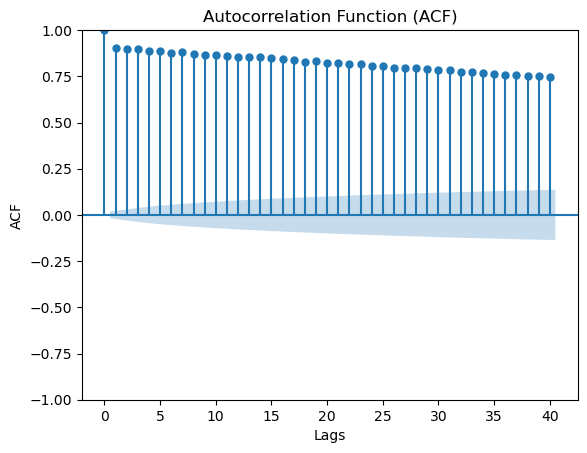

<Figure size 1200x400 with 0 Axes>

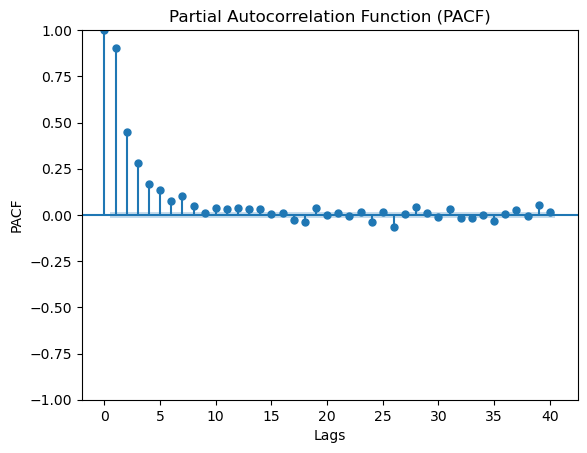

In [68]:
# Convert the 'Date' column to datetime if it's not already
training_data['Date'] = pd.to_datetime(training_data['Date'])



# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(training_data['Consumption'], lags=40)  # Adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(training_data['Consumption'], lags=40)  # Adjust the number of lags as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

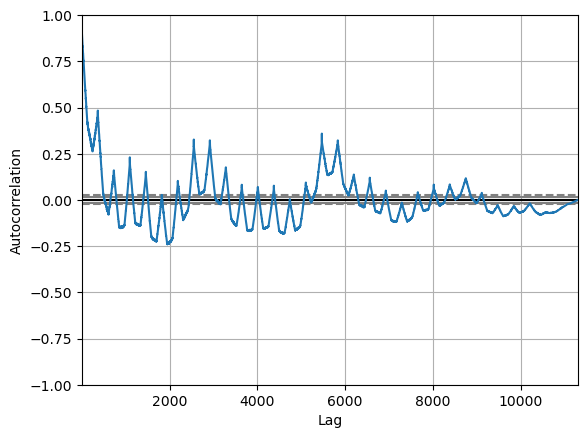

In [69]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(training_data['Consumption'])
plt.show()

In [70]:
import statsmodels.api  as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [71]:
training_data.set_index('Date',inplace=True)
training_data.head(5)

,Consumption
Date,
2017-01-01,3121791
2017-01-02,3054157
2017-01-03,2996857
2017-01-04,2925951
2017-01-05,2973448


In [72]:

P = 1  # Seasonal autoregressive order
D = 0  # Seasonal differencing order (0 if not needed)
Q = 1  # Seasonal moving average order
s = 4  # Seasonal period (quarterly seasonality)
model=sm.tsa.arima.ARIMA(training_data,order=(3,1,1), seasonal_order=(P, D, Q, s))
#model = SARIMAX(training_data, order=(1, 0, 0), seasonal_order=(P, D, Q, s))
model_fit=model.fit()

In [73]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                     Consumption   No. Observations:                11302
Model:             ARIMA(3, 1, 1)x(1, 0, 1, 4)   Log Likelihood             -144443.091
Date:                         Sun, 10 Sep 2023   AIC                         288900.181
Time:                                 17:55:41   BIC                         288951.510
Sample:                                      0   HQIC                        288917.450
                                       - 11302                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0934      0.015      6.084      0.000       0.063       0.123
ar.L2          0.0407      0.011      3.749      0.000       0.019       0.062
ar.L3          0.0326      0.009      3.778      0.000       0.016       0.050
ma.L1         -0.7867      0.015    -51.986      0.000      -0.816      -0.757
ar.S.L4        0.5187      1.625      0.319      0.750      -2.666       3.703
ma.S.L4       -0.5154      1.627     -0.317      0.751      -3.704       2.673
sigma2      7.492e+09   3.06e-09   2.45e+18      0.000    7.49e+09    7.49e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.38   Jarque-Bera (JB):             11225.90
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.01
Prob(H) (two-sided):                  0.66   Kurtosis:                         7.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.26e+33. Standard errors may be unstable.
"""

In [74]:
start_date = '2020-01-01'
end_date = '2020-12-30'
training_data['forecast']= model_fit.predict(start=start_date, end=end_date)
df.set_index('date',inplace=True)
training_data['Actual']=df['actual_limit']
# print(df['actual_limit'])


<Axes: xlabel='Date'>

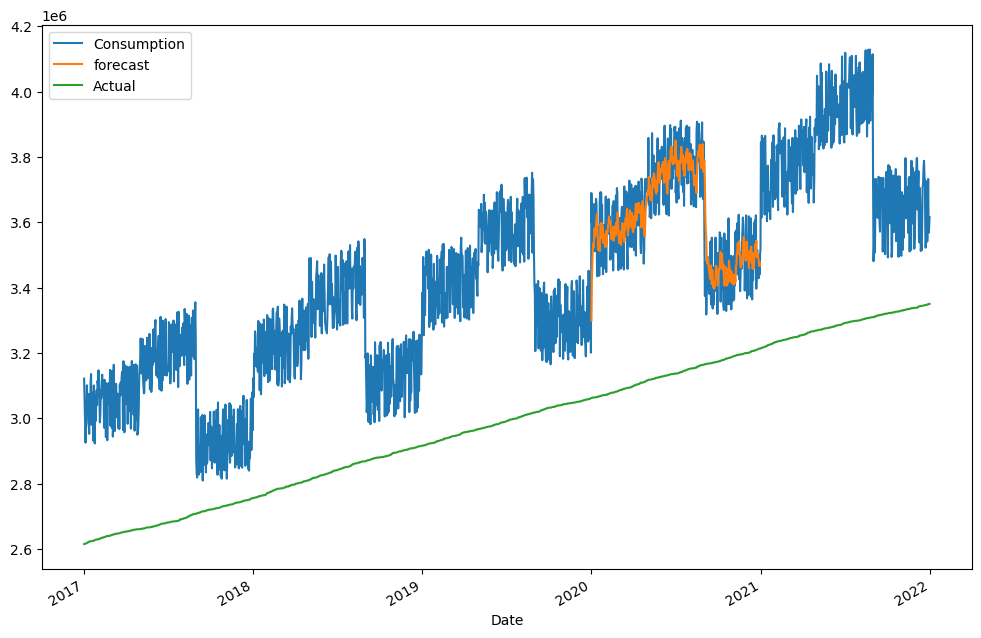

In [75]:
training_data[['Consumption','forecast','Actual']].plot(figsize=(12,8))

In [76]:
# Define the number of future periods to forecast
forecast_periods = 12000  # Adjust as needed to match the length of the forecasted values

# Extend the time index to include future dates
start_date = pd.to_datetime('2023-01-01')  # Replace with your desired start date
end_date = start_date + pd.DateOffset(days=forecast_periods - 1)  # Extend by 'forecast_periods - 1'

future_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Use the trained model to generate forecasts for future dates
forecast_values = model_fit.forecast(steps=forecast_periods)

# Create a DataFrame to store the forecasts
forecast_df = pd.DataFrame({'Date': future_date_range, 'Forecast': forecast_values})
# forecast_df['Forecast']=forecast_df['Forecast'].astype(int)
# Display the forecasted values
print(forecast_df.head(5))

            Date      Forecast
11302 2023-01-01  3.615765e+06
11303 2023-01-02  3.617238e+06
11304 2023-01-03  3.617963e+06
11305 2023-01-04  3.618421e+06
11306 2023-01-05  3.618700e+06


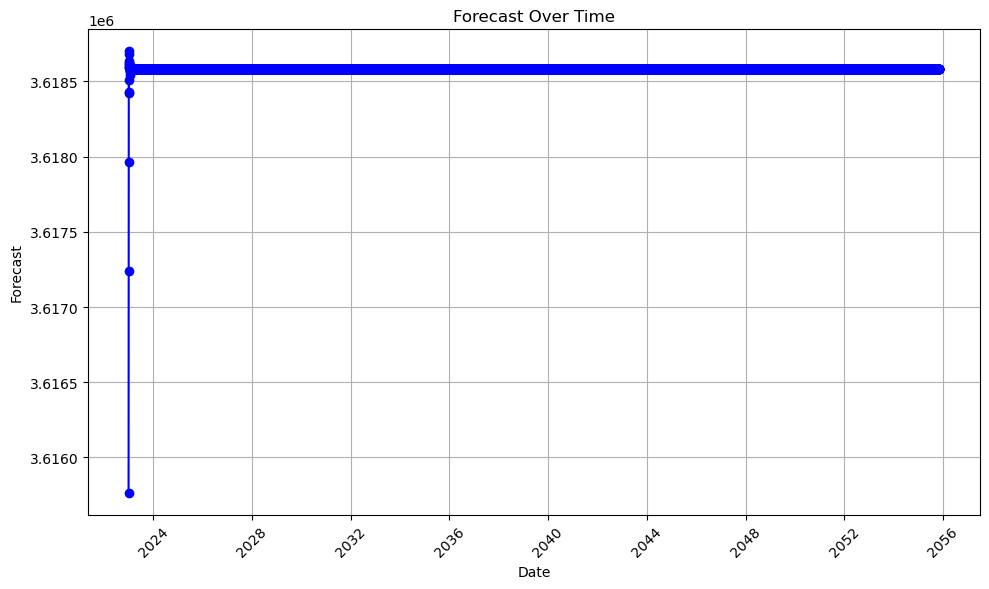

In [77]:


# # Convert the 'Date' column to a datetime format (if it's not already)
# forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(forecast_df['Date'], forecast_df['Forecast'], marker='o', linestyle='-', color='b')
plt.title('Forecast Over Time')
plt.xlabel('Date')
plt.ylabel('Forecast')
plt.grid(True)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()